# Dictionary generator
Here I'd try to make a big dictionary  

In [1]:
import re
import datetime

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

# Data

## English word-Chinese character dictionary
English-Chinese dictionary is taken from https://www.mdbg.net/chinese/dictionary?page=cedict

Format of the dictionary line:

```
Traditional Simplified [pin1 yin1] /English equivalent 1/equivalent 2/

```

Example of the line:
```
雀鳥 雀鸟 [que4 niao3] /bird/
```

One word to one character dictionary

In [2]:
word2hier = dict()
for line in open('data/cedict_ts.u8', 'r', encoding='utf-8'):
    if re.match(r'#.*', line):
#   Skip comments
        continue
    
    ch_trad, ch_simp, line = re.split(r' ', line, maxsplit=2)
#   We use simplified characters
    ch = ch_simp
    
    if not re.match(u'[\u4e00-\u9fff]\Z', ch):
#   Skip if ch contains more than one character
        continue
    
    _, eng_eqs = re.split(r'] /', line, maxsplit=1)
    eng_eqs = eng_eqs.split('/')[:-1]
    
#   Select only equivalents containing only one word
    eng_eqs = [eq for eq in eng_eqs if re.match(r'\w+\Z', eq)]
    
    for eng_eq in eng_eqs:
        word2hier[eng_eq] = ch

In [3]:
len(word2hier.keys())

4795

## Generate images from unicode srtings

In [6]:
def draw_char(ch, size=64, bw=False):
    img = Image.new("RGB",[size,size], "black")
    
    font = ImageFont.truetype('data/CODE2000.TTF', size, encoding="unic")
    ImageDraw.Draw(img).text((0, -size * 0.125), ch, fill="white", font=font)
    
    img = np.asarray(img)
    bwing = np.zeros((img.shape[0], img.shape[1]))

    if bw:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j, 0] > 0:
                    bwing[i, j] = 1
    else:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    bwing[i, j] = img[i, j, 0]
    img = bwing
    return img

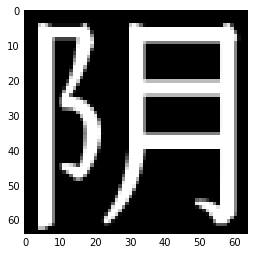

In [7]:
plt.imshow(draw_char(word2hier["moon"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()

## Reading word2vec
word2vec set is taken from http://nlp.stanford.edu/data/glove.42B.300d.zip

Containes pre-trained 300-dimensional vectors trained on Common Crawl (42B) dataset

In [4]:
word2vec = {}

lcount = 0
wcount = 0

for line in open('./data/glove.42B.300d.txt', 'r', encoding='utf-8'):
    word, vect = line.split(" ", maxsplit=1)
    
    if word in word2hier.keys():
        wcount += 1
        vect = [float(n) for n in vect[:-1].split(" ")]
        word2vec[word] = vect
    
    lcount += 1
    if (lcount % 100000 == 0):
        print("{} lines read, {} words found".format(lcount, wcount))
       
print("{} lines read, {} words found".format(lcount, wcount))

100000 lines read, 4438 words found
200000 lines read, 4594 words found
300000 lines read, 4636 words found
400000 lines read, 4662 words found
500000 lines read, 4673 words found
600000 lines read, 4679 words found
700000 lines read, 4687 words found
800000 lines read, 4688 words found
900000 lines read, 4692 words found
1000000 lines read, 4695 words found
1100000 lines read, 4697 words found
1200000 lines read, 4702 words found
1300000 lines read, 4704 words found
1400000 lines read, 4704 words found
1500000 lines read, 4704 words found
1600000 lines read, 4705 words found
1700000 lines read, 4705 words found
1800000 lines read, 4705 words found
1900000 lines read, 4705 words found
1917494 lines read, 4706 words found


## Compose word to vector and character dictionary

In [8]:
char_size = 32

word2vec_char = {}
wcount = 0

for key in word2vec:
    word2vec_char[key] = {"vect": word2vec[key], "char": draw_char(word2hier[key], size=char_size).ravel()}
    
    wcount += 1
    if (wcount % 1000 == 0):
        print("{} words processed".format(wcount))
        
print("{} words processed".format(wcount))

1000 words processed
2000 words processed
3000 words processed
4000 words processed
4706 words processed


# Write everything

In [ ]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y_%H_%m_%S")
filename = "./data/word2_{}_vector2_{}x{}hier_{}.txt".format(len(word2vec["cat"]), 
                                                            char_size, char_size, 
                                                            timestamp)
print("writing to file: {}".format(filename))
fld = open(filename, 'w')

lcount = 0
for key in word2vec_char:
    
    vector = " ".join([str(n) for n in word2vec_char[key]["vect"]])
    image = " ".join([str(n) for n in word2vec_char[key]["char"]])
    try:
        fld.write("{},{},{}\n".format(key, vector, image))
    except:
        print(key)
    
    lcount +=1
    if (lcount % 1000 == 0):
        print("{} lines wrote".format(lcount))
        
fld.close()
print("{} lines wrote".format(lcount))

# An attempt to generate more Data

## Character images dataset augmentation
Let's create 100 versions for every char

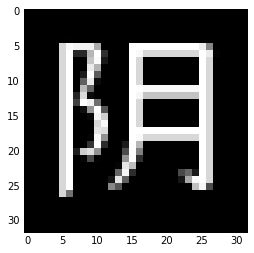

In [9]:
def draw_small_char(ch, size=32, bw=False):
    img = Image.new("RGB",[size,size], "black")
    
    font = ImageFont.truetype('data/CODE2000.TTF', int(size*0.75), encoding="unic")
    ImageDraw.Draw(img).text((size * 0.125, size * 0.0), ch, fill="white", font=font)
    
    img = np.asarray(img)
    bwing = np.zeros((img.shape[0], img.shape[1]))

    if bw:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j, 0] > 0:
                    bwing[i, j] = 1
    else:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    bwing[i, j] = img[i, j, 0]
    img = bwing
    return img

plt.imshow(draw_small_char(word2hier["moon"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Prepare data arrays

In [11]:
# word2vec vectors
X_vec = []
# character
Y_chr = []

wcount = 0
for word in word2vec:
    X_vec.append(word2vec[word])
    chr_img = draw_small_char(word2hier[word])
    Y_chr.append(np.reshape(chr_img, (chr_img.shape[0], chr_img.shape[1], 1)))
    
    wcount += 1
    if (wcount % 1000 == 0):
        print("{} words processed".format(wcount))
        
print("{} words processed".format(wcount))

X_vec = np.array(X_vec)
Y_chr = np.array(Y_chr)

1000 words processed
2000 words processed
3000 words processed
4000 words processed
4706 words processed


In [15]:
datagen = ImageDataGenerator(rotation_range=0,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1)

datagen.fit(Y_chr)

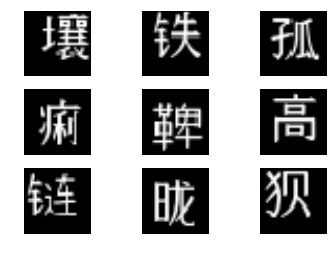

In [16]:
for Y_batch, X_batch in datagen.flow(Y_chr, X_vec, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(Y_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    plt.show()
    break

In [17]:
Y_chr_aug = np.array([Y_chr[0]])
X_vec_aug = np.array([X_vec[0]])

n_batches = Y_chr.shape[0]
batch_count = 0

for Y_batch, X_batch in datagen.flow(Y_chr, X_vec, batch_size=100):
    
    Y_chr_aug = np.concatenate((Y_chr_aug, Y_batch))
    X_vec_aug = np.concatenate((X_vec_aug, X_batch))
    
    batch_count += 1
    
    if (batch_count % 500 == 0):
        print("{} of {} batches processed".format(batch_count, n_batches))
    
    if batch_count >= n_batches:
        break
        
Y_chr_aug.shape, X_vec_aug.shape

500 of 4706 batches processed
1000 of 4706 batches processed
1500 of 4706 batches processed
2000 of 4706 batches processed
2500 of 4706 batches processed
3000 of 4706 batches processed
3500 of 4706 batches processed
4000 of 4706 batches processed
4500 of 4706 batches processed


((461389, 32, 32, 1), (461389, 300))

In [18]:
Y_chr_aug.shape, X_vec_aug.shape

((461389, 32, 32, 1), (461389, 300))

In [19]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y_%H_%m_%S")
filename = "./data/vector{}_2hier{}x{}_{}.txt".format(len(word2vec["cat"]), 
                                                          char_size, 
                                                          char_size, 
                                                          timestamp)
filename

'./data/vector300_2hier32x32_25_01_18_17_01_24.txt'

In [21]:
print("writing to file: {}".format(filename))
fld = open(filename, 'w')

nlines = Y_chr_aug.shape[0]
for i in range(nlines):
    vec = " ".join([str(n) for n in X_vec_aug[i]])
    img = " ".join([str(n) for n in Y_chr_aug[i].ravel()])
    
    fld.write("{},{}\n".format(vec, img))
        
    if (i % 10000 == 0):
        print("{} of {} lines".format(i, nlines))
        
fld.close()

writing to file: ./data/vector300_2hier32x32_25_01_18_17_01_24.txt
0 of 461389 lines
10000 of 461389 lines
20000 of 461389 lines
30000 of 461389 lines
40000 of 461389 lines
50000 of 461389 lines
60000 of 461389 lines
70000 of 461389 lines
80000 of 461389 lines
90000 of 461389 lines
100000 of 461389 lines
110000 of 461389 lines
120000 of 461389 lines
130000 of 461389 lines
140000 of 461389 lines
150000 of 461389 lines
160000 of 461389 lines
170000 of 461389 lines
180000 of 461389 lines
190000 of 461389 lines
200000 of 461389 lines
210000 of 461389 lines
220000 of 461389 lines
230000 of 461389 lines
240000 of 461389 lines
250000 of 461389 lines
260000 of 461389 lines
270000 of 461389 lines
280000 of 461389 lines
290000 of 461389 lines
300000 of 461389 lines
310000 of 461389 lines
320000 of 461389 lines
330000 of 461389 lines
340000 of 461389 lines
350000 of 461389 lines
360000 of 461389 lines
370000 of 461389 lines
380000 of 461389 lines
390000 of 461389 lines
400000 of 461389 lines
4100